# Example to connect to postgres

This is a tutorial to connect to our PostgreSQL database using python.

First you need to install the following libraries:
- psycopg2
- python-dotenv

Then you need to create a file with the name ".env". This file will contain the connection information and your credentials. This is an example:

```
DB_HOST=host_name
DB_NAME=postgres
DB_USER=my_user
DB_PASSWORD=my_password
DB_PORT=5432
```

After that you´re all set. We will import your credentials and connect to the database.

In [599]:
import os
import pandas as pd
import numpy as np
import os
import psycopg2 # PostgreSQL database adapter for Python
from dotenv import load_dotenv # Reads the key-value pair from .env file and adds them to environment variable
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MaxAbsScaler

In [474]:
import warnings
warnings.filterwarnings("ignore")

In [618]:
# Load environment variables from .env file
load_dotenv()

# Accessing credentials
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_port = os.getenv("DB_PORT")

In [476]:
# Connect to the database
conn = psycopg2.connect(
    host=db_host,
    dbname=db_name,
    user=db_user,
    password=db_password,
    port=db_port
)

Now we can query our data (write sql code) and store it as a pandas dataframe

In [619]:
query_main=query="""
    select * 
    from agg.tidy_data_final
    where site = 20
    AND timestamp <= '2020-03-27 00:00:00+00'::timestamp with time zone
"""
df_main = pd.read_sql_query(query_main, conn)

#agg.tidy_data_v2


In [620]:
pd.set_option('display.max_columns', None)

df_main

,timestamp,site,year,month,day,hour,minute,day_of_week,season,net_load,precipitation,precipitation_probability,wind_direction,wind_speed,solar_radiation,sunshine_duration,avg_net_load,q25_net_load,q75_net_load,median_net_load,weekend_or_bank_holiday
0,2019-04-01 00:30:00+00:00,20,2019,4,1,1,30,0,2,250.51,0.0,2.0,87.0,12.0,0.0,0.0,209.12,15.26,173.26,18.79,0
1,2019-04-01 00:00:00+00:00,20,2019,4,1,1,0,0,2,198.79,0.0,2.0,87.0,12.0,0.0,0.0,156.18,15.32,140.56,18.91,0
2,2019-04-01 01:30:00+00:00,20,2019,4,1,2,30,0,2,245.33,0.0,3.0,89.0,11.0,0.0,0.0,214.43,15.87,181.63,57.84,0
3,2019-04-01 01:00:00+00:00,20,2019,4,1,2,0,0,2,194.07,0.0,3.0,89.0,11.0,0.0,0.0,219.51,15.86,194.07,41.08,0
4,2019-04-01 02:30:00+00:00,20,2019,4,1,3,30,0,2,177.89,0.0,4.0,91.0,11.0,0.0,0.0,225.54,17.26,184.43,73.84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17324,2020-03-14 11:30:00+00:00,20,2020,3,14,12,30,5,2,-10.30,0.0,17.0,248.0,15.0,153.0,32.0,179.63,4.35,214.24,22.84,1
17325,2020-03-14 11:00:00+00:00,20,2020,3,14,12,0,5,2,347.18,0.0,17.0,248.0,15.0,153.0,32.0,189.71,13.15,242.57,31.38,1
17326,2020-03-14 12:30:00+00:00,20,2020,3,14,13,30,5,2,186.56,0.0,16.0,244.0,16.0,157.0,31.0,158.74,14.20,278.03,37.76,1
17327,2020-03-14 12:00:00+00:00,20,2020,3,14,13,0,5,2,168.35,0.0,16.0,244.0,16.0,157.0,31.0,190.64,12.44,274.00,29.88,1


In [621]:
df_main = df_main[['timestamp','net_load','month', 'day', 'hour', 'day_of_week', 'season', 'avg_net_load','weekend_or_bank_holiday','solar_radiation','sunshine_duration', "precipitation_probability"]]
df_main

,timestamp,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,precipitation_probability
0,2019-04-01 00:30:00+00:00,250.51,4,1,1,0,2,209.12,0,0.0,0.0,2.0
1,2019-04-01 00:00:00+00:00,198.79,4,1,1,0,2,156.18,0,0.0,0.0,2.0
2,2019-04-01 01:30:00+00:00,245.33,4,1,2,0,2,214.43,0,0.0,0.0,3.0
3,2019-04-01 01:00:00+00:00,194.07,4,1,2,0,2,219.51,0,0.0,0.0,3.0
4,2019-04-01 02:30:00+00:00,177.89,4,1,3,0,2,225.54,0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17324,2020-03-14 11:30:00+00:00,-10.30,3,14,12,5,2,179.63,1,153.0,32.0,17.0
17325,2020-03-14 11:00:00+00:00,347.18,3,14,12,5,2,189.71,1,153.0,32.0,17.0
17326,2020-03-14 12:30:00+00:00,186.56,3,14,13,5,2,158.74,1,157.0,31.0,16.0
17327,2020-03-14 12:00:00+00:00,168.35,3,14,13,5,2,190.64,1,157.0,31.0,16.0


### Convert Convert 'ts' to datetime and set as index

In [622]:
df_main.rename(columns={'timestamp':'ts'},inplace=True)
df_main['ts'] = pd.to_datetime(df_main['ts'])
df_main.set_index('ts', inplace=True)
df_main.sort_index(inplace=True)
df_main.head()

#df_main['datetime'] = pd.to_datetime(df_main['timestamp'])
#df_main.set_index('datetime', inplace=True)

,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,precipitation_probability
ts,,,,,,,,,,,
2019-04-01 00:00:00+00:00,198.79,4,1,1,0,2,156.18,0,0.0,0.0,2.0
2019-04-01 00:30:00+00:00,250.51,4,1,1,0,2,209.12,0,0.0,0.0,2.0
2019-04-01 01:00:00+00:00,194.07,4,1,2,0,2,219.51,0,0.0,0.0,3.0
2019-04-01 01:30:00+00:00,245.33,4,1,2,0,2,214.43,0,0.0,0.0,3.0
2019-04-01 02:00:00+00:00,223.68,4,1,3,0,2,235.79,0,0.0,0.0,4.0


### Normalise net_load, avg_net_load, precipitation_probability, solar_radiation, and sunshine_duration


In [608]:
#Previous code used for normalisign net_load

#df_main['net_load_norm'] = df_main['net_load'] / max(abs(df_main['net_load']))
#df_main.drop('net_load',axis=1,inplace=True)

In [623]:
#Normalise net_load, avg_net_load, precipitation_probability, solar_radiation, and sunshine_duration using MAXABS scaler
scaler = MaxAbsScaler()
df_main[['net_load_norm','avg_net_load_norm','precipitation_probability_norm','solar_radiation_norm','sunshine_duration_norm']] = scaler.fit_transform(df_main[['net_load','avg_net_load','precipitation_probability','solar_radiation','sunshine_duration']])

df_main

,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,precipitation_probability,net_load_norm,avg_net_load_norm,precipitation_probability_norm,solar_radiation_norm,sunshine_duration_norm
ts,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,198.79,4,1,1,0,2,156.18,0,0.0,0.0,2.0,0.066453,0.095949,0.02,0.0,0.0
2019-04-01 00:30:00+00:00,250.51,4,1,1,0,2,209.12,0,0.0,0.0,2.0,0.083742,0.128473,0.02,0.0,0.0
2019-04-01 01:00:00+00:00,194.07,4,1,2,0,2,219.51,0,0.0,0.0,3.0,0.064875,0.134856,0.03,0.0,0.0
2019-04-01 01:30:00+00:00,245.33,4,1,2,0,2,214.43,0,0.0,0.0,3.0,0.082010,0.131735,0.03,0.0,0.0
2019-04-01 02:00:00+00:00,223.68,4,1,3,0,2,235.79,0,0.0,0.0,4.0,0.074773,0.144857,0.04,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26 22:00:00+00:00,289.54,3,26,23,3,2,296.75,0,0.0,0.0,1.0,0.096789,0.182308,0.01,0.0,0.0
2020-03-26 22:30:00+00:00,270.53,3,26,23,3,2,318.98,0,0.0,0.0,1.0,0.090434,0.195965,0.01,0.0,0.0
2020-03-26 23:00:00+00:00,271.85,3,27,0,4,2,326.67,0,0.0,0.0,1.0,0.090876,0.200689,0.01,0.0,0.0


<Axes: xlabel='ts'>

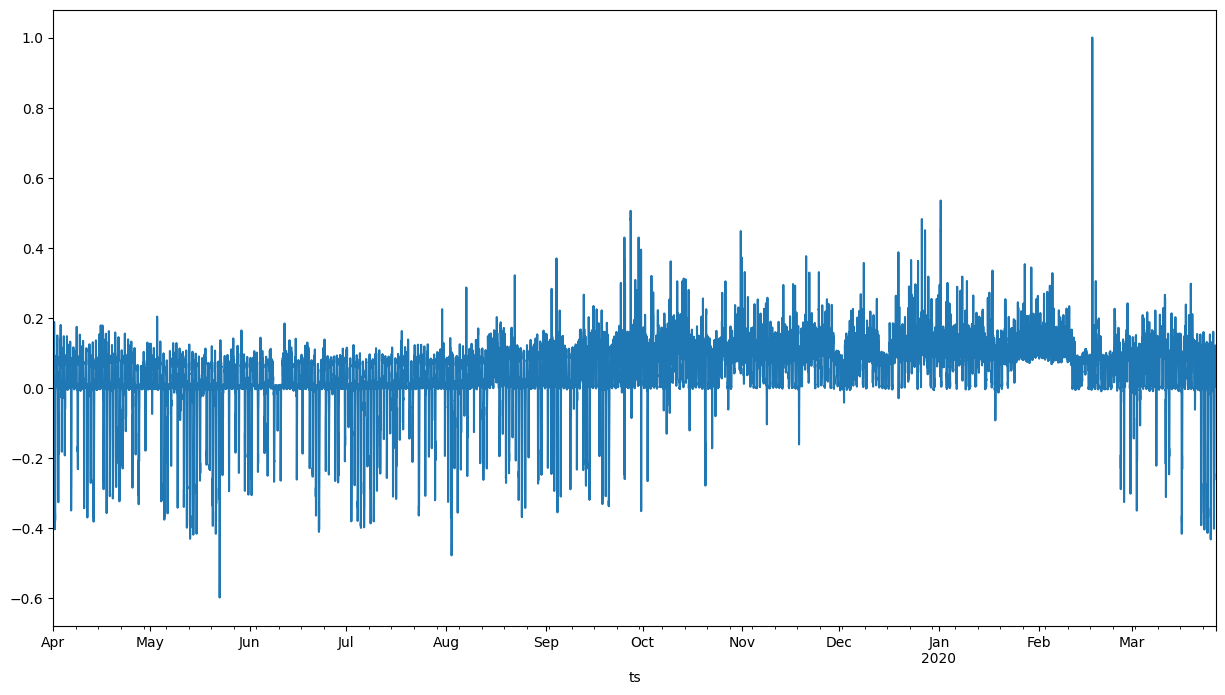

In [614]:
plt.figure(figsize=(15,8))
df_main['net_load_norm'].plot()

In [615]:
df_main.head()

,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,precipitation_probability,net_load_norm,avg_net_load_norm,precipitation_probability_norm,solar_radiation_norm,sunshine_duration_norm
ts,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,198.79,4,1,1,0,2,156.18,0,0.0,0.0,2.0,0.066453,0.095949,0.02,0.0,0.0
2019-04-01 00:30:00+00:00,250.51,4,1,1,0,2,209.12,0,0.0,0.0,2.0,0.083742,0.128473,0.02,0.0,0.0
2019-04-01 01:00:00+00:00,194.07,4,1,2,0,2,219.51,0,0.0,0.0,3.0,0.064875,0.134856,0.03,0.0,0.0
2019-04-01 01:30:00+00:00,245.33,4,1,2,0,2,214.43,0,0.0,0.0,3.0,0.082010,0.131735,0.03,0.0,0.0
2019-04-01 02:00:00+00:00,223.68,4,1,3,0,2,235.79,0,0.0,0.0,4.0,0.074773,0.144857,0.04,0.0,0.0


## Creating function for lagged net_load

In [624]:
#Creating function for lagged net_load

def create_lagged_features(df, lags):
    df_lagged = df.copy()
    for lag in lags:
        df_lagged[f'net_load_lag_{lag}'] = df_lagged['net_load_norm'].shift(lag)
    # Remove rows with NaN values due to shifting
    #df_lagged = df_lagged.dropna()
    return df_lagged

# Define your lags
lags = [1,2,3,4,5,48,96]


# Prepare your dataset with lagged features
df_lagged = create_lagged_features(df_main, lags)

df_lagged

,net_load,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration,precipitation_probability,net_load_norm,avg_net_load_norm,precipitation_probability_norm,solar_radiation_norm,sunshine_duration_norm,net_load_lag_1,net_load_lag_2,net_load_lag_3,net_load_lag_4,net_load_lag_5,net_load_lag_48,net_load_lag_96
ts,,,,,,,,,,,,,,,,,,,,,,,
2019-04-01 00:00:00+00:00,198.79,4,1,1,0,2,156.18,0,0.0,0.0,2.0,0.066453,0.095949,0.02,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 00:30:00+00:00,250.51,4,1,1,0,2,209.12,0,0.0,0.0,2.0,0.083742,0.128473,0.02,0.0,0.0,0.066453,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-01 01:00:00+00:00,194.07,4,1,2,0,2,219.51,0,0.0,0.0,3.0,0.064875,0.134856,0.03,0.0,0.0,0.083742,0.066453,NaN,NaN,NaN,NaN,NaN
2019-04-01 01:30:00+00:00,245.33,4,1,2,0,2,214.43,0,0.0,0.0,3.0,0.082010,0.131735,0.03,0.0,0.0,0.064875,0.083742,0.066453,NaN,NaN,NaN,NaN
2019-04-01 02:00:00+00:00,223.68,4,1,3,0,2,235.79,0,0.0,0.0,4.0,0.074773,0.144857,0.04,0.0,0.0,0.082010,0.064875,0.083742,0.066453,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-26 22:00:00+00:00,289.54,3,26,23,3,2,296.75,0,0.0,0.0,1.0,0.096789,0.182308,0.01,0.0,0.0,0.095816,0.120965,0.083040,0.011279,0.005970,0.086256,0.109298
2020-03-26 22:30:00+00:00,270.53,3,26,23,3,2,318.98,0,0.0,0.0,1.0,0.090434,0.195965,0.01,0.0,0.0,0.096789,0.095816,0.120965,0.083040,0.011279,0.092336,0.095469
2020-03-26 23:00:00+00:00,271.85,3,27,0,4,2,326.67,0,0.0,0.0,1.0,0.090876,0.200689,0.01,0.0,0.0,0.090434,0.096789,0.095816,0.120965,0.083040,0.086627,0.090712


## Create initial_ts by taking the last 96 observations (48 hours) from this point backward to cover all lags

(Previously took the last 192 observations of 15 minute-intervalls (48 hours) from this point backward to cover all lags)

In [625]:
# Identify the time point for initial_ts
#Identify the start and end points for creating an initial time series to use in rolling predictions. 
#Select a subset of df_lagge to be the set of data that the rolling prediction function will use to start making predictions


end_time = df_lagged.index[-1]
start_time = end_time - pd.Timedelta(hours=24)  # 192 intervals of 15 minutes is equivalent to 48 hours / Should i not be using 36 hours?

# Make sure you don't go out of bounds
if start_time < df_lagged.index[0]:
    raise ValueError("Not enough data points for the required lags.")

# Create for rolling predictions
# We select the data between 'start_time' and 'end_time', including all necessary lags.
initial_ts = df_lagged.loc[start_time:end_time]['net_load_norm']

In [486]:
initial_ts

ts
2020-03-26 00:00:00+00:00    0.085738
2020-03-26 00:30:00+00:00    0.085330
2020-03-26 01:00:00+00:00    0.072828
2020-03-26 01:30:00+00:00    0.085654
2020-03-26 02:00:00+00:00    0.099928
2020-03-26 02:30:00+00:00    0.080001
2020-03-26 03:00:00+00:00    0.083241
2020-03-26 03:30:00+00:00    0.076013
2020-03-26 04:00:00+00:00    0.115981
2020-03-26 04:30:00+00:00    0.159936
2020-03-26 05:00:00+00:00    0.107463
2020-03-26 05:30:00+00:00    0.079229
2020-03-26 06:00:00+00:00   -0.006238
2020-03-26 06:30:00+00:00   -0.005770
2020-03-26 07:00:00+00:00   -0.011396
2020-03-26 07:30:00+00:00   -0.001842
2020-03-26 08:00:00+00:00   -0.004035
2020-03-26 08:30:00+00:00   -0.003704
2020-03-26 09:00:00+00:00   -0.007989
2020-03-26 09:30:00+00:00   -0.346912
2020-03-26 10:00:00+00:00   -0.402400
2020-03-26 10:30:00+00:00   -0.332675
2020-03-26 11:00:00+00:00   -0.244721
2020-03-26 11:30:00+00:00   -0.263026
2020-03-26 12:00:00+00:00   -0.256618
2020-03-26 12:30:00+00:00   -0.256916
2020-03-2

## Define train and test sets 

In [626]:
features = ['net_load_lag_1', 'net_load_lag_2', 'net_load_lag_3', 'net_load_lag_4', 'net_load_lag_5', 
            'net_load_lag_48', 'net_load_lag_96', 'month', 'day', 'hour', 'day_of_week', 'season', 
            'avg_net_load_norm', 'weekend_or_bank_holiday', 'solar_radiation_norm', 'sunshine_duration_norm', 'precipitation_probability_norm']

In [627]:
#X = df_lagged[[f'net_load_lag_{lag}' for lag in lags]]
X = df_lagged[features]
y = df_lagged['net_load_norm']

# Reserve the last 72 observations for testing - 36 hours
train_features = X.iloc[:-72]
test_features = X.iloc[-72:]

train_target = y.iloc[:-72]
test_target = y.iloc[-72:]

In [489]:
print(train_features.shape)
print(test_target.shape)

(17257, 16)
(72,)


### Model definition and training 

In [628]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

## Create get_input functions

#### 1. get_lags_input (get lagged values of net_load_norm)
#### 2. get_other_features_input (get other features' values at the index/timestamp we are predicting for)
#### 3. get_prediction_input (combine 1 and 2)


#### 1. get_lags_input 

In [629]:
#get_timestamp_input

def get_lags_input(ts, lags):
    # Convert lags to positions from the end of the series
    positions = [- lag for lag in lags]
    # Use iloc to get values at positions
    return ts.iloc[positions].values.reshape(1, -1)

#### 2. get_other_features_input
1. Define new df = df_other_features from the train_features set (which includes lagged net_load values as well) and remove lagged values
2. Add back later on lagged values cthrough the get_input function to account for their updates 

In [630]:
df_other_features = test_features.drop(test_features.columns[test_features.columns.str.startswith('net_load_lag')], axis = 1)
df_other_features.tail()

,month,day,hour,day_of_week,season,avg_net_load_norm,weekend_or_bank_holiday,solar_radiation_norm,sunshine_duration_norm,precipitation_probability_norm
ts,,,,,,,,,,
2020-03-26 22:00:00+00:00,3,26,23,3,2,0.182308,0,0.0,0.0,0.01
2020-03-26 22:30:00+00:00,3,26,23,3,2,0.195965,0,0.0,0.0,0.01
2020-03-26 23:00:00+00:00,3,27,0,4,2,0.200689,0,0.0,0.0,0.01
2020-03-26 23:30:00+00:00,3,27,0,4,2,0.194472,0,0.0,0.0,0.01
2020-03-27 00:00:00+00:00,3,27,1,4,2,0.225030,0,0.0,0.0,0.01


In [631]:
def get_other_features_input(other_features, index):
    return other_features.loc[index].values.reshape(1, -1)

#### 3. get_prediction_input (combine 1 and 2)

In [632]:
def get_prediction_input(ts, other_features, lags):
    input_lags = get_lags_input(ts, lags)
    index = ts.index[-1] + pd.Timedelta(minutes=30)
    
    input_features = get_other_features_input(other_features, index)
    
    return np.concatenate((input_lags, input_features), axis = 1)

### Rolling origin prediction

Create a function that performs sequential predictions over a specified number of steps, using each prediction as input for the next

In [633]:
def rolling_window_predictions(model, full_series, other_features, n, lags):
    
    initial_ts = full_series.copy()#[-max(lags):] # Initial time series for rolling predictions    
    predictions = []  # Store out-of-sample predictions
    
    for i in range(0, n): # Iterate over the test set to predict one step ahead each time
        
        input_features = get_prediction_input(initial_ts, other_features, lags) # Get the input features for the current prediction

        pred = model.predict(input_features)[0] # Predict the next time step and store the prediction
        predictions.append(pred)
        
        # Append the actual observed value to roll the window forward
        new_index = initial_ts.index[-1] + pd.Timedelta(minutes=30)

        print("new_index: ", new_index)
        
        initial_ts.loc[new_index] = pred
    
    return predictions


In [496]:
# Check for missing values

#df_other_features

#check df_other_features between Timestamp('2020-03-28 23:00:00+0000', tz='UTC') and Timestamp('2020-03-29 01:00:00+0000', tz='UTC')
#df_other_features.loc['2020-03-28 23:00:00+00:00':'2020-03-29 02:00:00+00:00']

In [634]:
prediction_test=rolling_window_predictions(rf, train_target, df_other_features, 72, lags)
#len(prediction_test)

new_index:  2020-03-25 12:30:00+00:00
new_index:  2020-03-25 13:00:00+00:00
new_index:  2020-03-25 13:30:00+00:00
new_index:  2020-03-25 14:00:00+00:00
new_index:  2020-03-25 14:30:00+00:00
new_index:  2020-03-25 15:00:00+00:00
new_index:  2020-03-25 15:30:00+00:00
new_index:  2020-03-25 16:00:00+00:00
new_index:  2020-03-25 16:30:00+00:00
new_index:  2020-03-25 17:00:00+00:00
new_index:  2020-03-25 17:30:00+00:00
new_index:  2020-03-25 18:00:00+00:00
new_index:  2020-03-25 18:30:00+00:00
new_index:  2020-03-25 19:00:00+00:00
new_index:  2020-03-25 19:30:00+00:00
new_index:  2020-03-25 20:00:00+00:00
new_index:  2020-03-25 20:30:00+00:00
new_index:  2020-03-25 21:00:00+00:00
new_index:  2020-03-25 21:30:00+00:00
new_index:  2020-03-25 22:00:00+00:00
new_index:  2020-03-25 22:30:00+00:00
new_index:  2020-03-25 23:00:00+00:00
new_index:  2020-03-25 23:30:00+00:00
new_index:  2020-03-26 00:00:00+00:00
new_index:  2020-03-26 00:30:00+00:00
new_index:  2020-03-26 01:00:00+00:00
new_index:  

In [498]:
####### with n = 36 
#predicted_values = rolling_window_predictions(rf, train_target, other_features = df_other_features, n = 36, lags=[1,2,3,4,5,48,96])

#len(predicted_values)
# predicted_values = rolling_window_predictions(rf, train_target, 36, lags=[1,2,3,4,5,48,96])

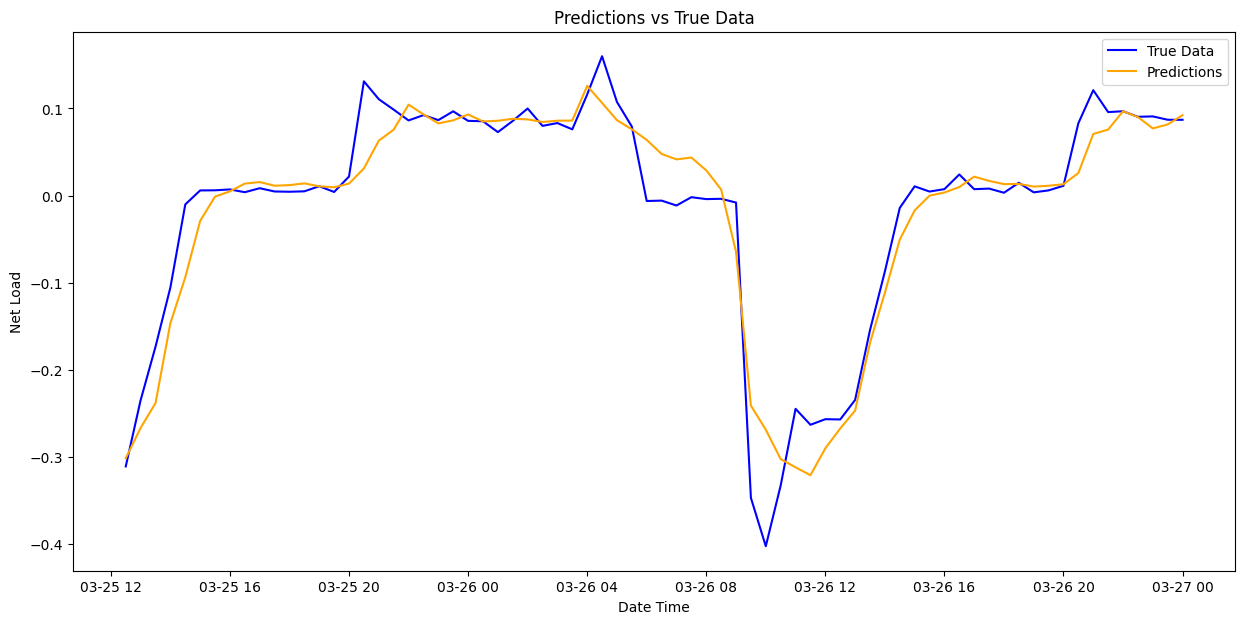

In [635]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(test_target.index, prediction_test, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()


In [500]:
print(len(predicted_values))
#predicted_values

36


## Implement the rolling window predictions with the new function

## Re-define train + test to include 30 days for test

In [513]:
X = df_lagged[features]
y = df_lagged['net_load_norm']


In [522]:
test_split_date = '2020-02-24 00:00:00+00:00'
#test_split_date = '2020-02-24 00:00:00+00:00'
train_features = X.loc[X.index < test_split_date]
train_target = y.loc[y.index < test_split_date]

test_features = X.loc[X.index >= test_split_date]
test_target = y.loc[y.index >= test_split_date]

In [523]:
df_other_features_2 = test_features.drop(test_features.columns[test_features.columns.str.startswith('net_load_lag')], axis = 1)
df_other_features_2.tail()

,month,day,hour,day_of_week,season,avg_net_load,weekend_or_bank_holiday,solar_radiation,sunshine_duration
ts,,,,,,,,,
2020-03-26 22:00:00+00:00,3,26,23,3,2,290.05,0,0.0,0.0
2020-03-26 22:30:00+00:00,3,26,23,3,2,311.75,0,0.0,0.0
2020-03-26 23:00:00+00:00,3,27,0,4,2,319.25,0,0.0,0.0
2020-03-26 23:30:00+00:00,3,27,0,4,2,309.38,0,0.0,0.0
2020-03-27 00:00:00+00:00,3,27,1,4,2,357.93,0,0.0,0.0


In [524]:
rf = RandomForestRegressor()

# TRAIN the model
rf.fit(train_features, train_target)

# TEST the model - Predict on the test set - Make predictions for the test set
y_pred = rf.predict(test_features)

In [551]:
def nested_prediction_model(model, input_ts, other_features, true_data, n_shifts, n_steps, n_days, lags=[1,2,3,4,5,48,96] ):
    full_predictions = []
    ts = input_ts.copy()
# Iterate over each day in the test data
    for day in range(0, n_days):
        
        # Make predictions for the current day
        print("predicting day: ", day)
        pred_day = rolling_window_predictions(model, ts, other_features, n_steps, lags)

        # Append the day's predictions to the full predictions
        full_predictions.extend(pred_day[n_shifts:])

        # update true values
        true_values = true_data[day*(n_steps-n_shifts) : (day+1)*(n_steps-n_shifts)]
    

        ts = pd.concat([ts, pd.Series(true_values)]) # Update ts by appending the true values

    return full_predictions



In [576]:
n_shifts = 24
n_steps = 72
n_days = 31

In [577]:
# Set input ts as train_target and append the first n_shifts values of test_target
input_ts = pd.concat([train_target, test_target.iloc[:n_shifts]])

In [578]:
input_ts

ts
2019-04-01 00:00:00+00:00    0.066453
2019-04-01 00:30:00+00:00    0.083742
2019-04-01 01:00:00+00:00    0.064875
2019-04-01 01:30:00+00:00    0.082010
2019-04-01 02:00:00+00:00    0.074773
                               ...   
2020-02-24 09:30:00+00:00    0.069184
2020-02-24 10:00:00+00:00    0.015695
2020-02-24 10:30:00+00:00    0.071230
2020-02-24 11:00:00+00:00    0.098437
2020-02-24 11:30:00+00:00    0.042110
Name: net_load_norm, Length: 15816, dtype: float64

In [579]:
############### Previous code for nested_prediction_model with only 36 hours of predictions at each time ############################

#def nested_prediction_model(model, input_ts, other_features, true_data, n_steps, n_days, lags=[1,2,3,4,5,48,96] ):
    #full_predictions = []
    #ts = input_ts.copy()
# Iterate over each day in the test data
    #for day in range(0, n_days):
        
        # Make predictions for the current day
        #pred_day = rolling_window_predictions(model, ts, other_features, n_steps, lags)

        # Append the day's predictions to the full predictions
        #full_predictions.extend(pred_day)

        # update true values
        #true_values = true_data[day*n_steps : (day+1)*n_steps]

        #ts = pd.concat([ts, pd.Series(true_values)]) # Update ts by appending the true values

    #return full_predictions



In [580]:
full_predictions=nested_prediction_model(rf, input_ts, df_other_features_2, test_target[n_shifts:], n_shifts, n_steps, n_days, lags=[1,2,3,4,5,48,96])
#full_predictions

predicting day:  0
new_index:  2020-02-24 12:00:00+00:00
new_index:  2020-02-24 12:30:00+00:00
new_index:  2020-02-24 13:00:00+00:00
new_index:  2020-02-24 13:30:00+00:00
new_index:  2020-02-24 14:00:00+00:00
new_index:  2020-02-24 14:30:00+00:00
new_index:  2020-02-24 15:00:00+00:00
new_index:  2020-02-24 15:30:00+00:00
new_index:  2020-02-24 16:00:00+00:00
new_index:  2020-02-24 16:30:00+00:00
new_index:  2020-02-24 17:00:00+00:00
new_index:  2020-02-24 17:30:00+00:00
new_index:  2020-02-24 18:00:00+00:00


new_index:  2020-02-24 18:30:00+00:00
new_index:  2020-02-24 19:00:00+00:00
new_index:  2020-02-24 19:30:00+00:00
new_index:  2020-02-24 20:00:00+00:00
new_index:  2020-02-24 20:30:00+00:00
new_index:  2020-02-24 21:00:00+00:00
new_index:  2020-02-24 21:30:00+00:00
new_index:  2020-02-24 22:00:00+00:00
new_index:  2020-02-24 22:30:00+00:00
new_index:  2020-02-24 23:00:00+00:00
new_index:  2020-02-24 23:30:00+00:00
new_index:  2020-02-25 00:00:00+00:00
new_index:  2020-02-25 00:30:00+00:00
new_index:  2020-02-25 01:00:00+00:00
new_index:  2020-02-25 01:30:00+00:00
new_index:  2020-02-25 02:00:00+00:00
new_index:  2020-02-25 02:30:00+00:00
new_index:  2020-02-25 03:00:00+00:00
new_index:  2020-02-25 03:30:00+00:00
new_index:  2020-02-25 04:00:00+00:00
new_index:  2020-02-25 04:30:00+00:00
new_index:  2020-02-25 05:00:00+00:00
new_index:  2020-02-25 05:30:00+00:00
new_index:  2020-02-25 06:00:00+00:00
new_index:  2020-02-25 06:30:00+00:00
new_index:  2020-02-25 07:00:00+00:00
new_index:  

In [581]:
len(test_target)

1537

In [582]:
# set test target plot as the true values from (n_steps - n_shifts) to (ndays + 1)*(n_steps - n_shifts)

test_target_plot = test_target.iloc[n_steps- n_shifts: (n_days + 1)*(n_steps - n_shifts)]

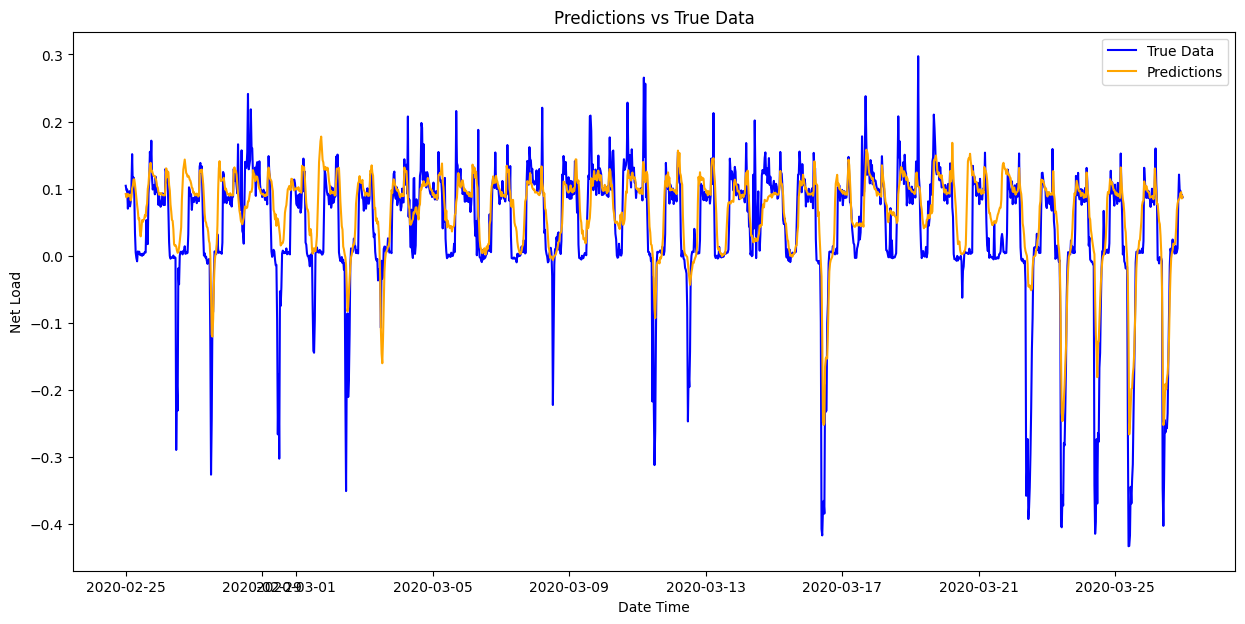

In [583]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(test_target_plot.index, test_target_plot, label='True Data', color='blue')
#plt.plot(full_predictions.index, full_predictions[-len(test_target.index):], label='Predictions', color='orange')
plt.plot(test_target_plot.index, full_predictions, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()


## MAE, MSE, and RMSE

#### Test

In [591]:
# print the MAE, MSE and RMSE for the test 
mae_test = mean_absolute_error(test_target_plot, full_predictions)
mse_test = mean_squared_error(test_target_plot, full_predictions)
rmse_test = np.sqrt(mse_test)

print("Test MAE:", mae_test)
print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)



Test MAE: 0.0392644540846599
Test MSE: 0.004068325513125184
Test RMSE: 0.06378342663361058


### Train

In [592]:
# print the MAE, MSE and RMSE for the train
train_predictions = rf.predict(train_features)
mae_train = mean_absolute_error(train_target, train_predictions)
mse_train = mean_squared_error(train_target, train_predictions)
rmse_train = np.sqrt(mse_train)

print("Test MAE:", mae_train)
print("Test MSE:", mse_train)
print("Test RMSE:", rmse_train)

Test MAE: 0.007177007103447671
Test MSE: 0.0001727408570027832
Test RMSE: 0.013143091607486543


### . 

### . 

### . 

### . 

In [ ]:
len(full_predictions)

2160

Convert full_predictions into a Pandas Series with the same index as the test_target

In [ ]:
full_predictions_series = pd.Series(full_predictions, index=test_target.index[:len(full_predictions)])



In [ ]:
print(len(test_target))
print(len(train_target))

2160
15169


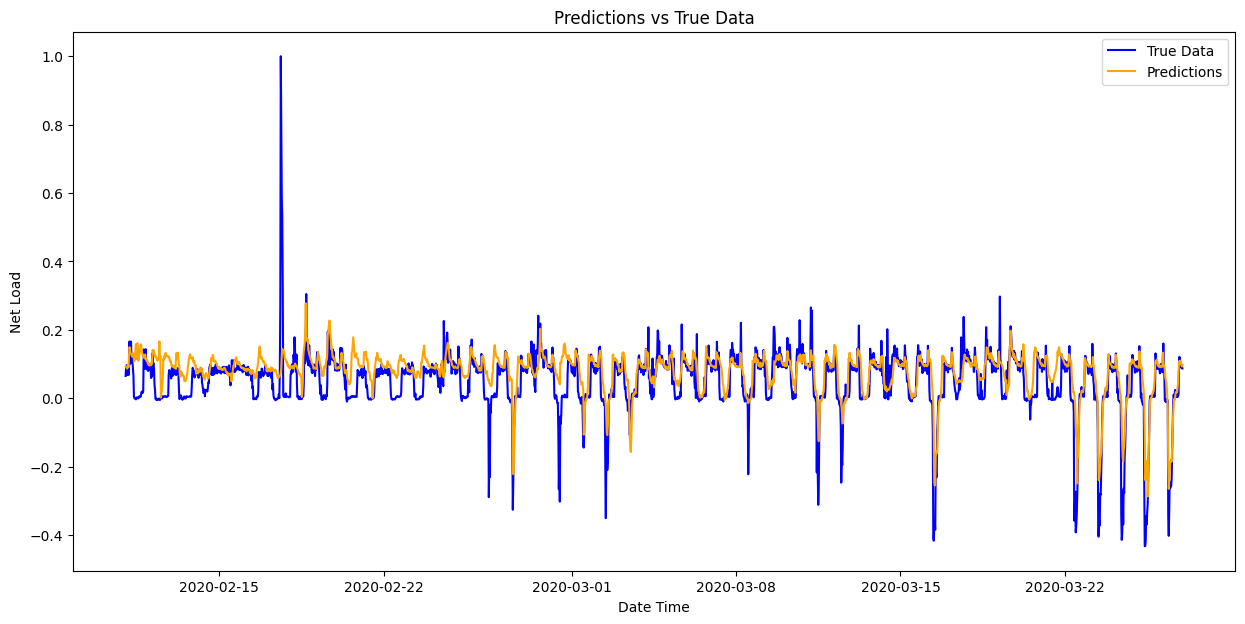

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(test_target.index, test_target, label='True Data', color='blue')
plt.plot(full_predictions_series.index, full_predictions_series, label='Predictions', color='orange')

plt.title('Predictions vs True Data')
plt.xlabel('Date Time')
plt.ylabel('Net Load')
plt.legend()
plt.show()